# **Information Retrieval In High Dimensional Data**
## **Assignment 1 - Group 13**
  Group members | IDs
--- | ---
**Hoang Giang Dang** | 03676899
**Julian Bärtschi**  | 03738123
**Lukas Vogtmann** | 03745272
**Anja Pilz** | 03729350
**Aman Kumar**  | 03722433
**Lisa-Yao Gan** | 03695778
**Estefania Tealdo** | 03717779

# **Task 1**
## **1.1**

$Pr(X\in \mathcal{C}_d)=\frac{Vol(\mathcal{C}_d)}{Vol(\mathcal{C}_1)}=\frac{Vol(\mathcal{C}_d)}{1}=Vol(\mathcal{C}_d)=d^p=q$

From this it follows directly:
$d=f(p,q)=q^{\frac{1}{p}}$ 

## **1.2**

The probability that that at least one componet of $X^p$ lies outside the inteval [-2.576, 2.576] is the same as one minus the probability that all components fall within this interval. With the independence of the components it follows: $Pr(\|X^p\|_\infty > 2.576)=1-Pr(|X^1|\leq 2.576)^p = 1-0.99^p$

Dimensions | Probability
--- | ---
p=2 | 0.0199
p=3 | 0.0297
p=500 | 0.993

In [9]:
import numpy as np
# np.set_printoptions(precision=2)
ps = [2,3,500]
probabilities = [1.0-0.99**p for p in ps]

print(np.array([ps,probabilities]).T)

[[2.00000000e+00 1.99000000e-02]
 [3.00000000e+00 2.97010000e-02]
 [5.00000000e+02 9.93429517e-01]]


# **Task 2**

## **2.1**

##### The function ```sampleUniformCube()``` creates  a numpy array with ```num_points``` rows and ```dims``` columns 

In [10]:
import numpy as np

def sampleUniformCube(num_points=100, dims=2, length=2.0):
  points=[np.random.uniform(-length/2,length/2,dims) for i in range(num_points)]
  points= np.array(points)
  return points

data = sampleUniformCube(100,2,2)

## **2.2** 
##### The function ```calcAngle()``` determines the minimum angles to all other vectors and computes the average of these minimus angles

In [11]:
def calcAngle(data_points):
  num_points_f = data_points.shape[0]
  temp = data_points @ data_points.T # matrix product to calc innerproduct between all x and y
  norms = np.matrix(np.sqrt(np.diagonal(temp))) # squared norms are on the diagonal 
  cosines = temp/(norms.T@norms) # devide each inner product of x and y by the two respective norms
  cosines=cosines[~np.eye(cosines.shape[0],dtype=bool)].reshape(cosines.shape[0],-1) # remove elements on the diagonal
  cosines = np.minimum(cosines, 1.0) # somtimes values become slightly bigger that 1.0 because of limited precision
  min_angles=np.arccos(np.max(cosines, axis=1))
  min_angle_mean=np.mean(min_angles)

  return min_angle_mean

mean_angle = calcAngle(data)
print(mean_angle)


0.03262990107280252


## **2.3**
##### Plot average minimum angle agains number of dimensions $d$

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


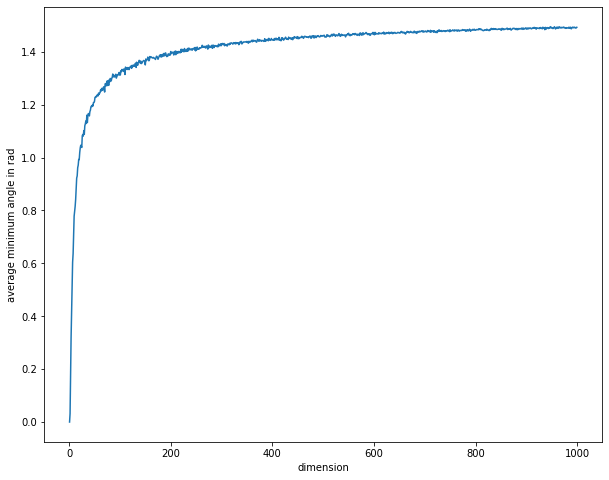

In [14]:
import matplotlib.pyplot as plt

test_dimensions=range(1000)
average_means=[calcAngle(sampleUniformCube(100, d, 2)) for d in test_dimensions]

fig, ax = plt.subplots(figsize=(10,8))

ax.set_xlabel('dimension')
ax.set_ylabel('average minimum angle in rad')
ax.plot(test_dimensions, average_means)

## **2.4**
##### For high dimensions the minimum average angle approaches $\frac{\pi}{2}$ which means that the vectors are all pairwise almost orthogonal to each other.

## **2.5**
##### Yes, when the sample size is increased the average minimum angle gets smaller. This is also intuitive, because, if we would have enough samples to fill the hypercube there would be more random vectors close to each other and thus, having a smaller angle in between. Nevertheless, we see only small changes when increasing the sample size by a factor of 10, because in high dimensions most of the cube is still empty.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


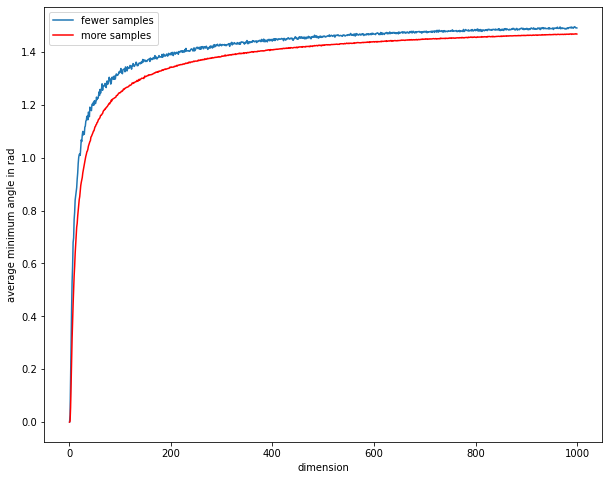

In [13]:
import matplotlib.pyplot as plt

test_dimensions=range(1000)
average_means_high=[calcAngle(sampleUniformCube(1000, d, 2)) for d in test_dimensions]



average_means_low=[calcAngle(sampleUniformCube(100, d, 2)) for d in test_dimensions]

fig, ax = plt.subplots(figsize=(10,8))

ax.set_xlabel('dimension')
ax.set_ylabel('average minimum angle in rad')
ax.plot(test_dimensions, average_means_low, label='fewer samples')
ax.plot(test_dimensions, average_means_high, label='more samples',color='r')
ax.legend();

# **Task 3**
## **3.1**
##### Yes, because all the cells are positive and the sum up to 1.

## **3.2**
###### $E_{Y|X=2} [Y]=\sum_{i=1}^3 i * \frac{P(Y = i| X = 2)}{P(X = 2)} = 1 * \frac{0.4}{0.59} + 2 * \frac{0.14}{0.59} + 3 * \frac{0.04}{0.59} = \frac{83}{59} = 1.4$<br><br>

##### $P_{Y=3} [X = 1] = \frac{P_{Y=3} [X = 1]}{P [Y = 3]} = \frac{0.13}{0.18} = 0.72$ 

## **3.3**
$p(x,y)$ is not a joint density function for two random variables because the following would need to hold:<br>

<br>
$\int_{0}^{1}\int_{0}^{0.5} 1 \,dxdy = 1$,<br><br>but:<br>

$\int_{0}^{1}\int_{0}^{0.5} 1 \,dxdy = \int_{0}^{1} [y]_{y=0}^{y=0.5} \,dx = \int_{0}^{1} [0.5 - 0] \,dx = \int_{0}^{1} [0.5] \,dx = [0.5 * x]_{x=0}^{x=1} = [0.5 - 0] = 0.5$

## **3.4**
##### Marginal density functions for $X$ and $Y$:
$f_y(y) = \int_{0}^{y} p(x,y) \,dx = [-2 * e^{-x-y}]_{x=0}^{x=y} = [-2 * e^{-y-y}] - [-2 * e^{0-y}] = -2 * [e^{-2y} - e^{-y}]$, for $0 ≤  y ≤  \infty $ and 0 elsewhere<br><br>
$f_x(x) = \int_{x}^{\infty} p(x,y) \,dy = [-2 * e^{-x-y}]_{y=x}^{y=\infty} = [-2 * e^{-\infty}] - [-2 * e^{-x-x}] = 0 - [-2 * e^{-x-x}] = 2 * e^{-x-x}$, for $0 ≤  x ≤  \infty$ and 0 elsewhere

## **3.5**
Probability for $X≤2$ under the condition that $Y = \frac{1}{2}$

$P_{y=0.5}(X ≤ 2) => f_{x|y}(x|y) = \frac{f_{xy}(x,y)}{f_y(y)} $<br><br>
$f_y(y) = \int_{0}^{3} p(x,y) \,dx = [\frac{1}{15} * (x^2 + 4yx)]_{x=0}^{x=3} = \frac{9}{15} + \frac{12y}{15} - 0 - 0 = \frac{3}{5} + \frac{4}{5}y$ for $0 <  y <  3$ and 0 elsewhere<br><br>
$f_{x|y}(x|y) = \frac{f_{xy}(x,y)}{f_y(y)} = \frac{\frac{1}{15}*(2x + 4y)}{\frac{3}{5} + \frac{4}{5}y} = \frac{2x + 4y}{9 + 12y}$ for $0 <  x <  3$, $0 <  y <  1$ and 0 elsewhere<br><br>
$f_{x|y}(x|y=0.5) = \frac{2x + 2}{9 + 6} = \frac{2x + 2}{15}$ for $0 <  x <  3$ and 0 elsewhere<br><br>
$P_{y=0.5}(X ≤ 2) = \int_{0}^{2} f_{x|y}(x|y=0.5) \,dx = [\frac{x^2 + 2x}{15}]_{x=0}^{x=2} = \frac{4 + 4}{15} - 0 = \frac{8}{15} = 0.53$

## **Task 4**

##### Let the Covariance matrix of the random variable $X \in \mathbb{R}^p$ be denoted as: <br> $C:=E[(X-E[X])*(X-E[X])^T]$

Then for any $z \in \mathbb{R}^p$ it holds that: <br>$z^T *C *z= z^T*E[(X-E[X])*(X-E[X])^T]*z=E[r^T*r]\geq0$, with $r=(X-E[X])^T*z$ and $C^T=C$. 

Thus **$C$ is symmetric positive semidefinite.**